# Load the data

In [1]:
# import pandas for structuring the data
import pandas as pd

# import numpy for numerical analysis
import numpy as np

# import os
import os

In [2]:
# Getting path for both winequality-red.xlsx and winequality-white.xslx
cwd = os.getcwd()
data_path = cwd + '\\data\\'
path_red = data_path + 'winequality-red.xlsx'
path_white = data_path + 'winequality-white.xlsx'

print(f'red : {path_red}')
print(f'white : {path_white}')

red : C:\Users\Oscar\Documents\GitHub\Dat4-BI-MP2\data\winequality-red.xlsx
white : C:\Users\Oscar\Documents\GitHub\Dat4-BI-MP2\data\winequality-white.xlsx


##### NB: bug/errors when loading in the two xlsx files.

First, I tried using pandas' 'read_csv()' but ended up getting a 'UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 14: invalid start byte' after looking for an answer on Stack Overflow and other sources. They seem to be saying that the data encoding could be wrong, and I tried three different solutions; however, it didn't work.

To fix this, I ended up using 'read_excel()', however, if you use 'index_col=0', this would mess up the first column 'fixed acidity', so 'index_col=0' was removed. However, you can use 'index_col=None' without a problem (because the default value is None in DataFrame).

In [3]:
df_red = pd.read_excel(path_red, na_values=['NA'], skiprows=[0])
df_white = pd.read_excel(path_white, na_values=['NA'], skiprows=[0])

In [4]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Clean Data In Both Files:  

In [6]:
# Checking the datasets for Null values
print(f'White null sum for each col:\n\n{df_white.isnull().sum()}\n-------------------------\n')
print(f'Red null sum for each col:\n\n{df_red.isnull().sum()}\n')

White null sum for each col:

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
-------------------------

Red null sum for each col:

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64



Removing all empty cells and replacing them with na value and check how many na values each cell has.

In [7]:
# import sys to get module from util dir.
import sys
sys.path.append('./util')

# import own two fucntion replace_empty & get_na_count
from wine_util import replace_empty, get_na_count

In [8]:
# Use replace_empty to remove empty cells
replace_empty(df_red)

In [9]:
# Count all nah/na values
na_count = get_na_count(df_red)
for key, value in na_count.items():
    print(f'{key} : {value}')

fixed acidity : 0
volatile acidity : 0
citric acid : 0
residual sugar : 0
chlorides : 0
free sulfur dioxide : 0
total sulfur dioxide : 0
density : 0
pH : 0
sulphates : 0
alcohol : 0
quality : 0


In [10]:
# Check both red & white's columns: 'free sulfur dioxide' & 'total sulfur dioxide'
#  - if they actually needs to be folat. 
def check_float(series):
    res = 0
    for value in series:
        if value % 1 != 0:
            res = res + 1
    return res
        
v = check_float(df_red['free sulfur dioxide'])
v1 = check_float(df_red['total sulfur dioxide'])
v2 = check_float(df_white['total sulfur dioxide'])
v3 = check_float(df_white['free sulfur dioxide'])

print(v)
print(v1)
print(v2)
print(v3)

4
2
27
54


In [11]:
# Changing data type from flaot to int:
df_red['free sulfur dioxide'] = df_red['free sulfur dioxide'].astype(int)
df_red['total sulfur dioxide'] = df_red['total sulfur dioxide'].astype(int)
df_white['total sulfur dioxide'] = df_white['total sulfur dioxide'].astype(int)
df_white['free sulfur dioxide'] = df_white['free sulfur dioxide'].astype(int)

In [12]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [13]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6


### Aggregate the two files in one still keeping the identity of each wine- "red" or "white".

In [14]:
# For each file red & white add a extra column 'wine_type'
df_red['wine_type'] = 'red'
df_white['wine_type'] = 'white'

df_white['wine_type'] = df_white['wine_type'].astype('category')
df_red['wine_type'] = df_red['wine_type'].astype('category')

In [15]:
# Verify if the two files have a wine_type column
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red


In [16]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,white


In [17]:
# Make a combined dataframe for the two files & verify them:
combined_df = pd.concat([df_red, df_white], ignore_index=True)
combined_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24,92,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57,168,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30,111,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20,110,0.98869,3.34,0.38,12.8,7,white


In [18]:
# Save the new combineddataframe into a new CSV file
combined_df.to_csv(data_path + "combined_wine_data.csv", index=False)

# Explore The Data

In [19]:
# Number of rows and columns:
print(f'{df_red.shape}')
print(f'{df_white.shape}')
print(f'{combined_df.shape}')

(1599, 13)
(4898, 13)
(6497, 13)


In [20]:
# Type of data in each column
print(f'White:\n\n{df_white.dtypes}\n-------------------------\n')
print(f'Red:\n\n{df_red.dtypes}\n-------------------------\n')
print(f'Combined:\n\n{combined_df.dtypes}')

White:

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide        int32
total sulfur dioxide       int32
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                    int64
wine_type               category
dtype: object
-------------------------

Red:

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide        int32
total sulfur dioxide       int32
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                    int64
wine_type               category
dtype: object
-------------------------

Combined:

fixed acidity           float64
vol

### Calculate the descriptive statistics of the numeric data. 

In [21]:
# imoports for descriptive statistics
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [22]:
descriptive_stats = combined_df.describe()

# Display descriptive statistics
descriptive_stats

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.520856,115.742343,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.743162,56.518612,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [23]:
# Function that can perform test for normality
def test_normality(data):    
    stat, p = stats.shapiro(data)
    alpha = 0.05

    mean = np.mean(data)
    median = np.median(data)
    mode = stats.mode(data)
    
    print("Shapiro-Wilk test:")
    print("Statistic:", stat, "p-value:", p)
    print(f"mean: = {mean}, median: = {median}, mode: = {mode}")
    
    if p > alpha:
        print("Sample looks normally distributed (fail to reject H0) \n")
    else:
        print("Sample does not look normally distributed (reject H0) \n")

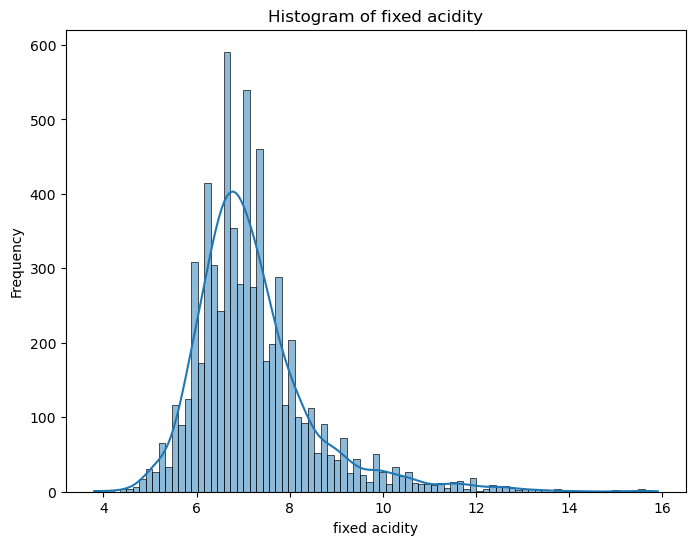

Shapiro-Wilk test:
Statistic: 0.8797879815101624 p-value: 0.0
mean: = 7.215307064799139, median: = 7.0, mode: = ModeResult(mode=6.8, count=354)
Sample does not look normally distributed (reject H0) 



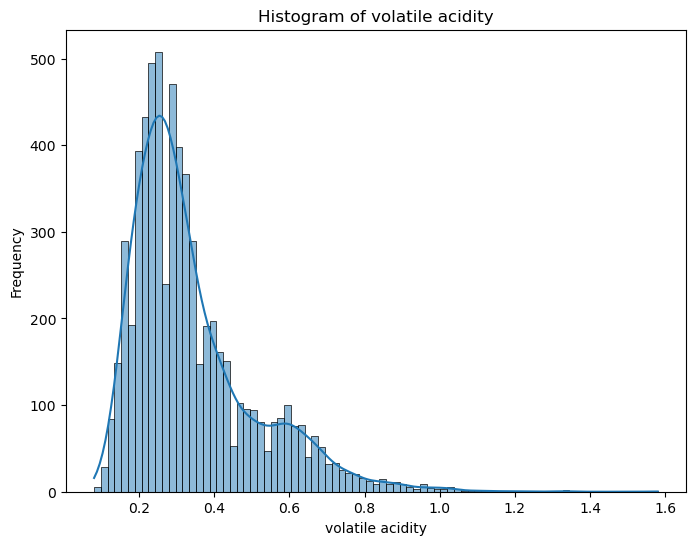

Shapiro-Wilk test:
Statistic: 0.875862181186676 p-value: 0.0
mean: = 0.3396659996921656, median: = 0.29, mode: = ModeResult(mode=0.28, count=286)
Sample does not look normally distributed (reject H0) 



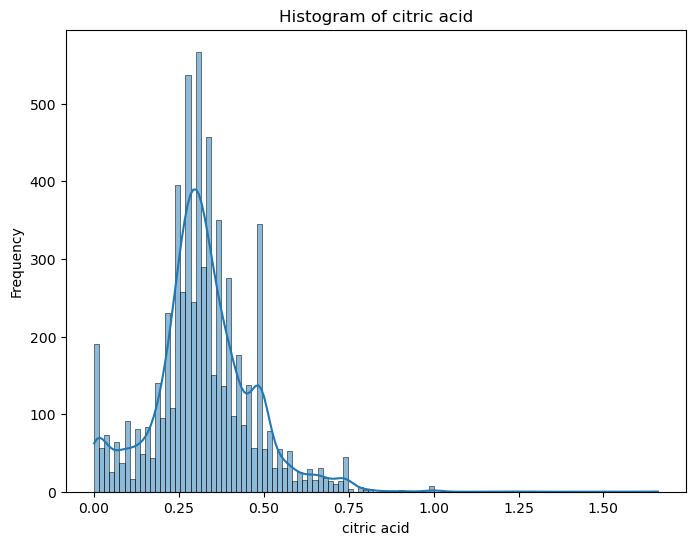

Shapiro-Wilk test:
Statistic: 0.9649786353111267 p-value: 5.271599623843331e-37
mean: = 0.3186332153301524, median: = 0.31, mode: = ModeResult(mode=0.3, count=337)
Sample does not look normally distributed (reject H0) 



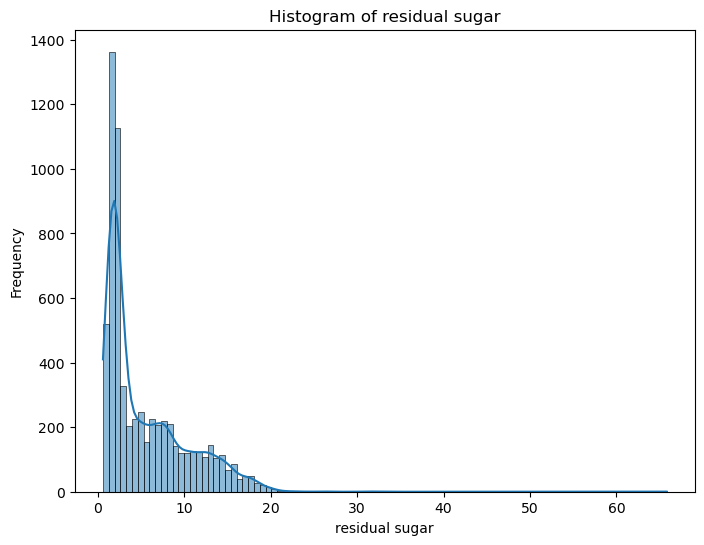

Shapiro-Wilk test:
Statistic: 0.824682354927063 p-value: 0.0
mean: = 5.443235339387409, median: = 3.0, mode: = ModeResult(mode=2.0, count=235)
Sample does not look normally distributed (reject H0) 



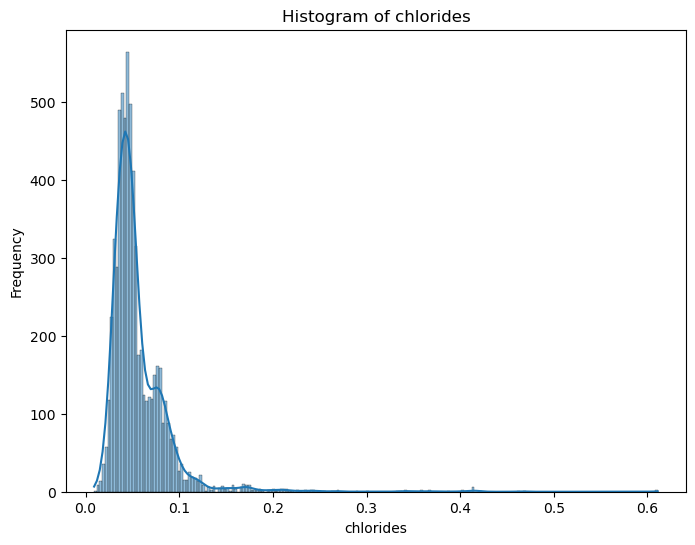

Shapiro-Wilk test:
Statistic: 0.6183151602745056 p-value: 0.0
mean: = 0.05603386178236109, median: = 0.047, mode: = ModeResult(mode=0.044, count=206)
Sample does not look normally distributed (reject H0) 



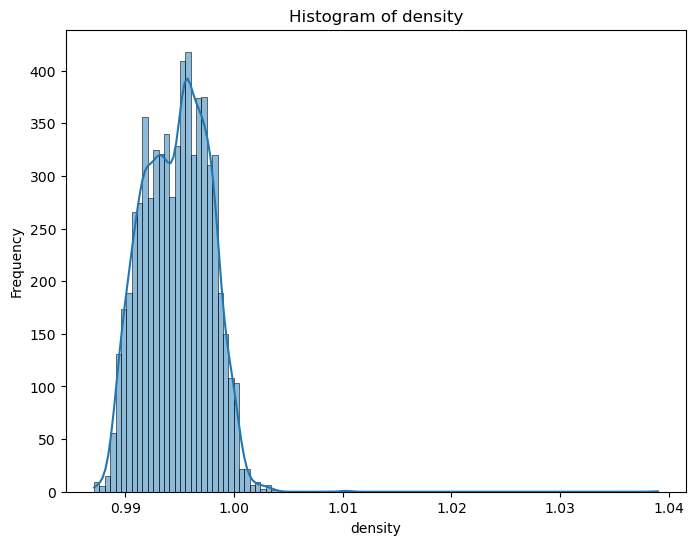

Shapiro-Wilk test:
Statistic: 0.9682108163833618 p-value: 1.330269304272158e-35
mean: = 0.9946966338309989, median: = 0.99489, mode: = ModeResult(mode=0.9972, count=69)
Sample does not look normally distributed (reject H0) 



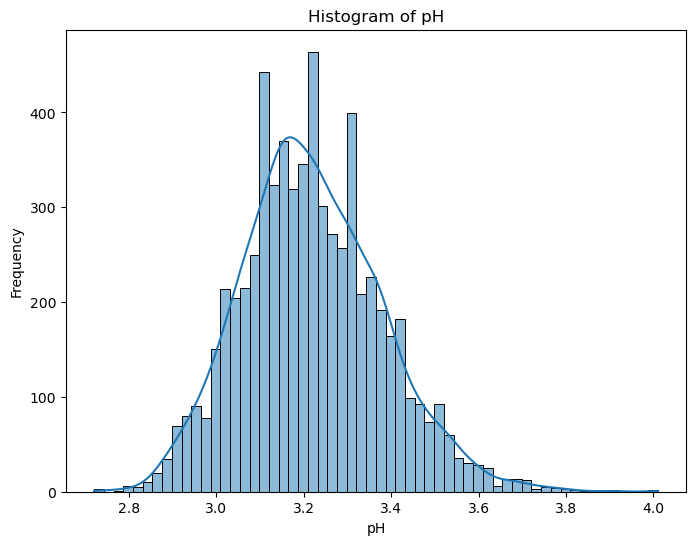

Shapiro-Wilk test:
Statistic: 0.9914482235908508 p-value: 2.2076225287757964e-19
mean: = 3.2185008465445586, median: = 3.21, mode: = ModeResult(mode=3.16, count=200)
Sample does not look normally distributed (reject H0) 



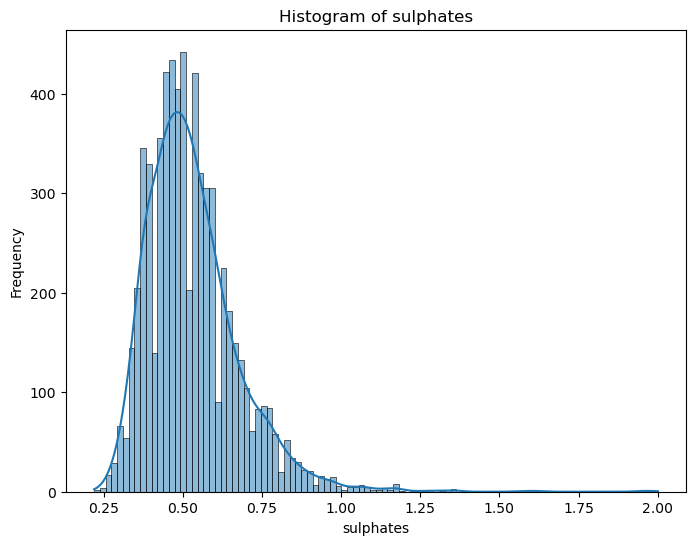

Shapiro-Wilk test:
Statistic: 0.8989558219909668 p-value: 0.0
mean: = 0.5312682776666154, median: = 0.51, mode: = ModeResult(mode=0.5, count=276)
Sample does not look normally distributed (reject H0) 



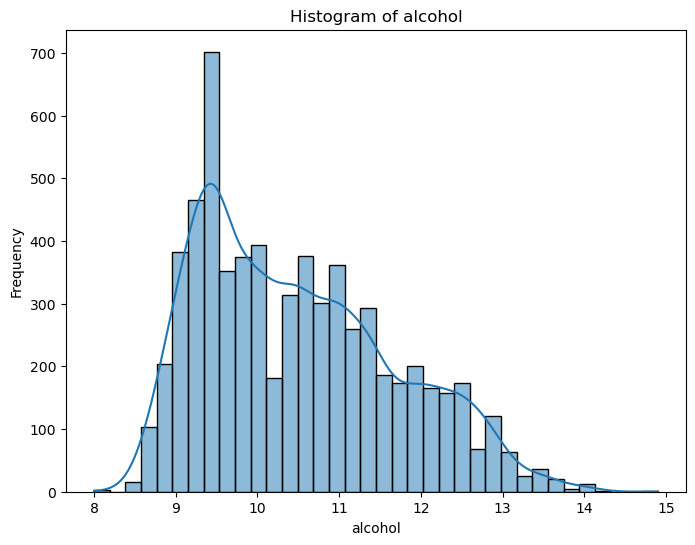

Shapiro-Wilk test:
Statistic: 0.9535516500473022 p-value: 2.9630456028148257e-41
mean: = 10.491800831152839, median: = 10.3, mode: = ModeResult(mode=9.5, count=367)
Sample does not look normally distributed (reject H0) 



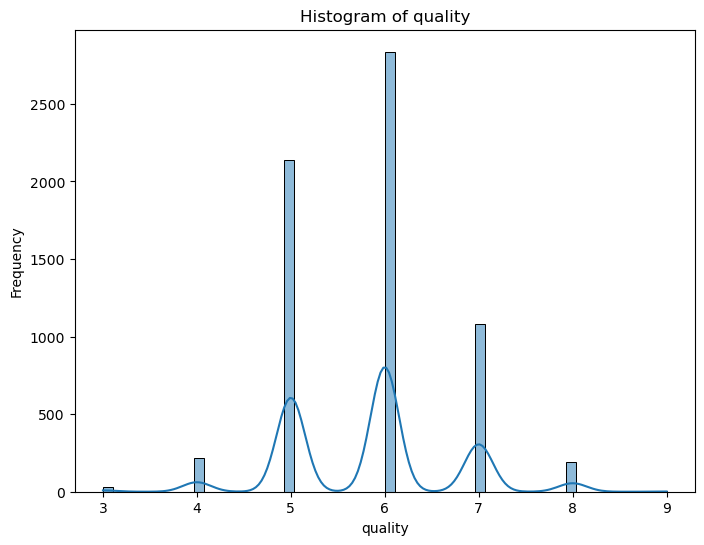

Shapiro-Wilk test:
Statistic: 0.8840959072113037 p-value: 0.0
mean: = 5.818377712790519, median: = 6.0, mode: = ModeResult(mode=6, count=2836)
Sample does not look normally distributed (reject H0) 



In [24]:
import warnings
warnings.filterwarnings("ignore")
# Plot histograms for numeric columns
numeric_columns = combined_df.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:

    plt.figure(figsize=(8, 6))
    sns.histplot(combined_df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    test_normality(combined_df[column])

In [25]:
# I do not appreciate after the test that none are normally distributed due to not being greater than alpha (0.05)

### Plot diagrams that visualize the differences in red and white wine samples.

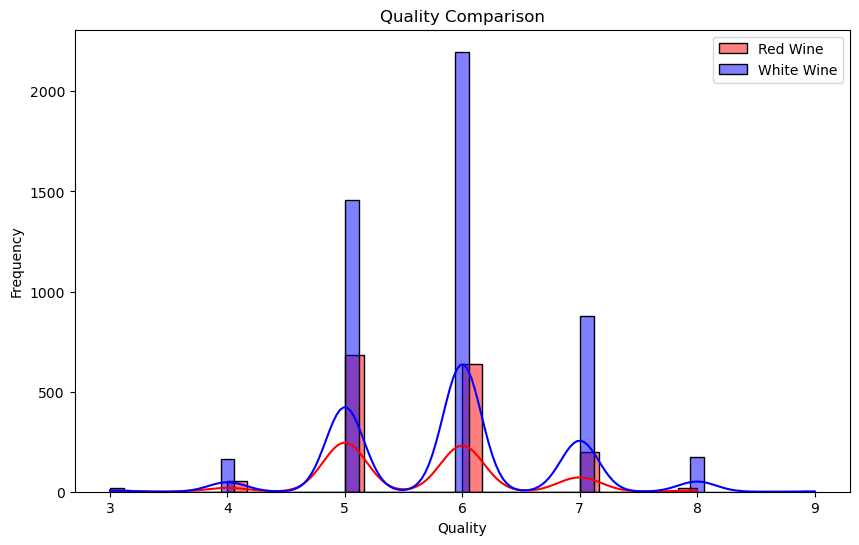

In [26]:
# Plot histograms for quality
plt.figure(figsize=(10, 6))
sns.histplot(df_red['quality'], color='red', alpha=0.5, label='Red Wine', kde=True)
sns.histplot(df_white['quality'], color='blue', alpha=0.5, label='White Wine', kde=True)
plt.title('Quality Comparison')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.legend()
plt.show()

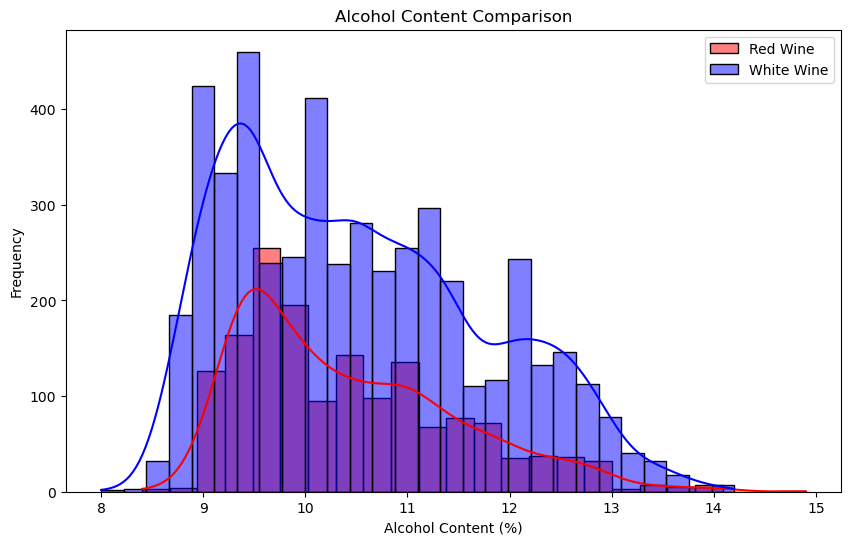

In [27]:
# Plot histograms for alcohol content
plt.figure(figsize=(10, 6))
sns.histplot(df_red['alcohol'], color='red', alpha=0.5, label='Red Wine', kde=True)
sns.histplot(df_white['alcohol'], color='blue', alpha=0.5, label='White Wine', kde=True)
plt.title('Alcohol Content Comparison')
plt.xlabel('Alcohol Content (%)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

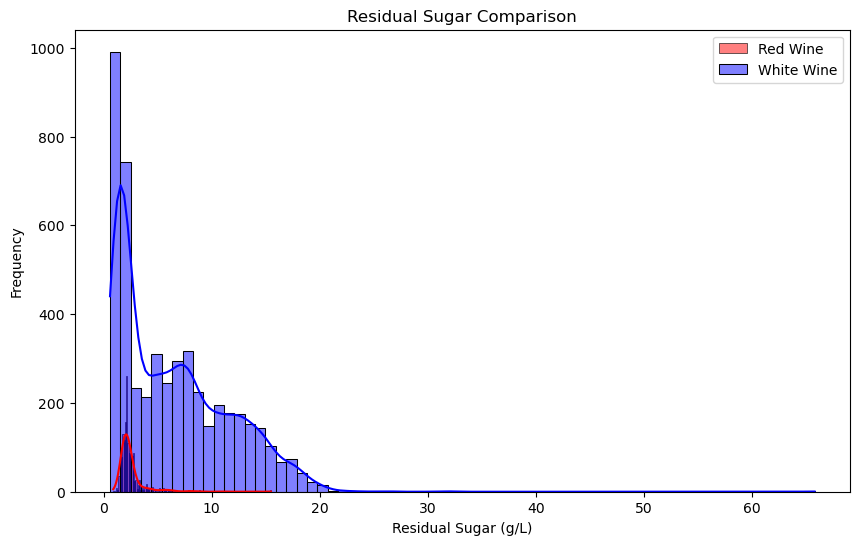

In [28]:
# Plot histograms for residual sugar
plt.figure(figsize=(10, 6))
sns.histplot(df_red['residual sugar'], color='red', alpha=0.5, label='Red Wine', kde=True)
sns.histplot(df_white['residual sugar'], color='blue', alpha=0.5, label='White Wine', kde=True)
plt.title('Residual Sugar Comparison')
plt.xlabel('Residual Sugar (g/L)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### What exactly is shown on the diagrams?

* Shows the distribution of quality ratings for red and white wines
* Shows the distribution of alcohol content for red and white wines.
* Shows the distribution of residual sugar content for red and white wines.

#### After seeing it, can you tell which type of wine has a higher average quality?

xxx

#### Which type of wine has a higher average level of alcohol?

xxx

#### Which one has a higher average quantity of residual sugar?

xxx

#### Which other questions might be of interest for the wine consumers or distributers?
* How do the acidity levels differ between red and white wines?
* 

### Split the aggregated data into five subsets by binning the attribute pH

#### Split data into 5 subsets by binning pH values:

In [29]:
# Extracts the 'pH' column from the dataframe 'combined_df'
pH_column = combined_df['pH']
n_bins = 5

# hist: It's an array where each element represents the count of data points in the corresponding bin
# bin_edges: variable stores the edges of the bins used in the histogram
hist, bin_edges = np.histogram(pH_column, bins = n_bins, density = True)

In [30]:
print(hist)
print(bin_edges)

[0.20880239 1.99495772 1.47056542 0.1920982  0.00954525]
[2.72  2.978 3.236 3.494 3.752 4.01 ]


In [31]:
# This function calculates the densities for each subset. 
# It iterates over the bins, calculates the density for each bin,
# and appends it to the s_densities

def subset_densities(n_bins, hist, bin_edges):
    s_densities = []
    for i in range(n_bins):
        s_density = hist[i] * np.diff(bin_edges)[0]
        s_densities.append(s_density)
    return s_densities

subset_densities_five = subset_densities(n_bins, hist, bin_edges)

In [32]:
subset_densities_five

[0.05387101739264275,
 0.5146990918885648,
 0.3794058796367555,
 0.04956133600123134,
 0.002462675080806526]

In [33]:
# Identify the subset with the highest density

# finds the index of the maximum density subset
max_density_subset_index = np.argmax(subset_densities_five) 

# Extracts the range of pH values corresponding to the subset with the highest density.
# It uses the bin edges to determine the range
max_density_subset = (bin_edges[max_density_subset_index], bin_edges[max_density_subset_index + 1])

print(f"Subset with the highest density for 5 subsets: pH range {max_density_subset}")

Subset with the highest density for 5 subsets: pH range (2.978, 3.2359999999999998)


In [34]:
# Split data into 10 subsets by binning pH values:
n_bins = 10
hist, bin_edges = np.histogram(pH_column, bins = n_bins, density = True)

In [35]:
print(hist)
print(bin_edges)

[0.0190905  0.39851428 1.471162   2.51875344 1.98421931 0.95691154
 0.31380017 0.07039624 0.01431788 0.00477263]
[2.72  2.849 2.978 3.107 3.236 3.365 3.494 3.623 3.752 3.881 4.01 ]


In [36]:
subset_densities_10 = subset_densities(n_bins, hist, bin_edges)

In [37]:
subset_densities_10

[0.002462675080806526,
 0.05140834231183623,
 0.18977989841465293,
 0.3249191934739121,
 0.25596429121132747,
 0.12344158842542755,
 0.04048022164075728,
 0.009081114360474065,
 0.0018470063106048944,
 0.0006156687702016315]

In [38]:
max_density_subset_index = np.argmax(subset_densities_10)
max_density_subset = (bin_edges[max_density_subset_index], bin_edges[max_density_subset_index + 1])

print(f"Subset with the highest density for 10 subsets: pH range {max_density_subset}")

Subset with the highest density for 10 subsets: pH range (3.107, 3.2359999999999998)


### Heat map & correlation matrix

In [39]:
data = combined_df
data = data.drop(['wine_type'], axis=1)
# Calculate the correlation matrix
correlation_matrix = data.corr()
correlation_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282815,-0.329064,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352580,-0.414489,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133130,0.195254,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402873,0.495485,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195136,-0.279654,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282815,-0.352580,0.133130,0.402873,-0.195136,1.000000,0.720787,0.025617,-0.145871,-0.188521,-0.179773,0.055485
total sulfur dioxide,-0.329064,-0.414489,0.195254,0.495485,-0.279654,0.720787,1.000000,0.032376,-0.238424,-0.275732,-0.265726,-0.041399
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025617,0.032376,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145871,-0.238424,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188521,-0.275732,0.259478,0.192123,1.000000,-0.003029,0.038485


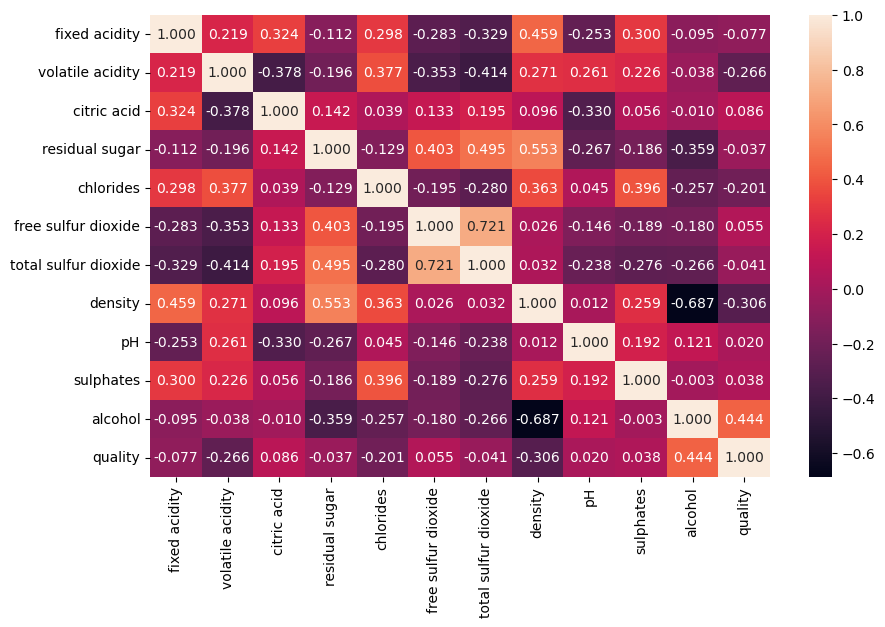

In [40]:
# NB: update - pip install seaborn --upgrade if version is 0.12.2 or lower
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".3f")
plt.show()

Can you tell which vine attribute has the biggest influence on the wine quality? 
* Alcohol (0.444)
  
Which has the lowest?
* Density (-0.306)

#### Do you get the same results when you analyze the red and white wine data sets separately?

In [41]:
data_red = df_red.drop(['wine_type'], axis=1)
data_white = df_white.drop(['wine_type'], axis=1)

# Calculate the correlation matrix for red and white wine
correlation_matrix_red = data_red.corr()
correlation_matrix_white = data_white.corr()

print('correlation_matrix_red\n')
correlation_matrix_red


correlation_matrix_red



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153742,-0.113165,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010416,0.076461,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.061119,0.035560,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.186862,0.203008,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005525,0.047399,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153742,-0.010416,-0.061119,0.186862,0.005525,1.000000,0.667182,-0.021738,0.070500,0.051741,-0.069563,-0.050792
total sulfur dioxide,-0.113165,0.076461,0.035560,0.203008,0.047399,0.667182,1.000000,0.071283,-0.066482,0.042971,-0.205641,-0.185089
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021738,0.071283,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070500,-0.066482,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051741,0.042971,0.148506,-0.196648,1.000000,0.093595,0.251397


In [42]:
print('correlation_matrix_white')
correlation_matrix_white

correlation_matrix_white


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049514,0.091072,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097008,0.089277,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094120,0.121141,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299102,0.401452,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101282,0.198886,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049514,-0.097008,0.094120,0.299102,0.101282,1.000000,0.615249,0.294100,-0.000641,0.059133,-0.250006,0.008205
total sulfur dioxide,0.091072,0.089277,0.121141,0.401452,0.198886,0.615249,1.000000,0.529888,0.002314,0.134574,-0.448892,-0.174775
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294100,0.529888,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000641,0.002314,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059133,0.134574,0.074493,0.155951,1.000000,-0.017433,0.053678


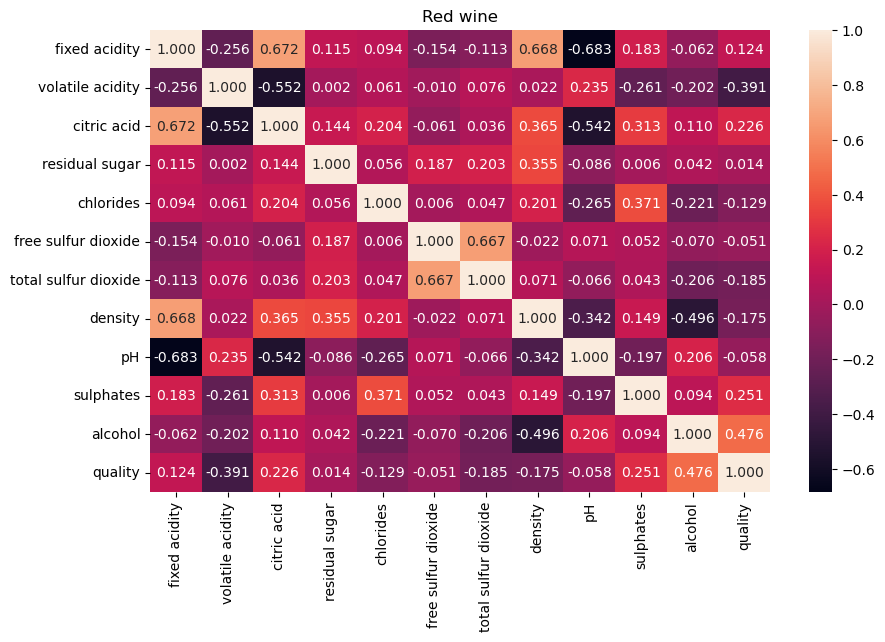

In [43]:
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_red, annot=True, fmt=".3f")
plt.title("Red wine")
plt.show()

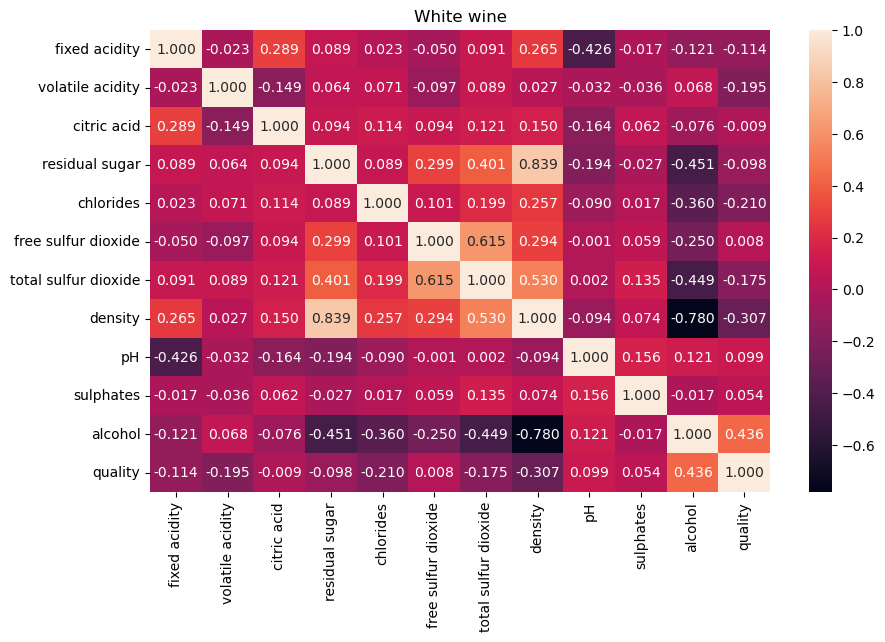

In [44]:
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_white, annot=True, fmt=".3f")
plt.title("White wine")
plt.show()

Do you get the same results when you analyze the red and white wine data sets separately?
- Red wine:
    * Biggest: same as when as combined (alcohol)
    * Lowest: volatile acidity(-0.391)
- White wine
    * Biggest: same as when as combined (alcohol)
    * Lowest: same as when as combined (density)

### Explore the feature ‘residual sugar’.

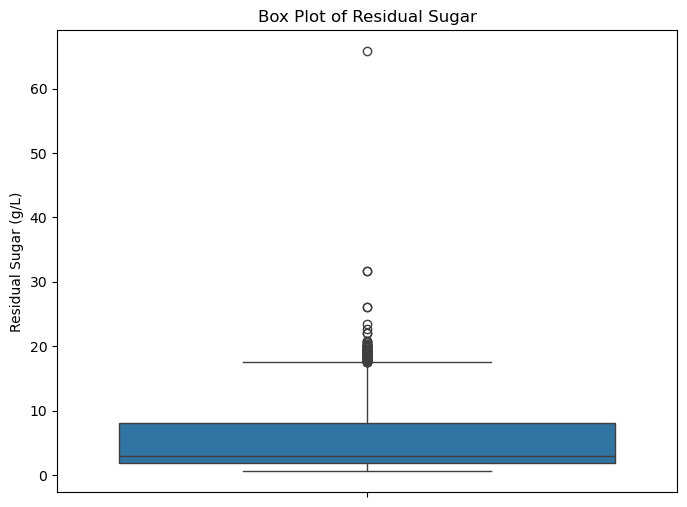

In [45]:
# Create a box plot to visualize the distribution of 'residual sugar'
plt.figure(figsize=(8, 6))
sns.boxplot(combined_df['residual sugar'])
plt.title('Box Plot of Residual Sugar')
plt.ylabel('Residual Sugar (g/L)')
plt.show()

In [46]:
# The max biggest value in 'residual sugar': 
biggest_outlier_value = np.max(combined_df['residual sugar'])
biggest_outlier_row = combined_df[combined_df['residual sugar'] == biggest_outlier_value].index[0]

print(f'Value for the biggest outlier: {biggest_outlier_value}')
print(f'Row for the biggest outlier: {biggest_outlier_row}')

combined_df = combined_df.drop(biggest_outlier_row)

Value for the biggest outlier: 65.8
Row for the biggest outlier: 4380


Is there any outlier (a value much different from the rest)? On which row is it found? Remove that row.
- We can see from the box plot above that, we have an outlier which is much bigger like 65,8 (g/L)
- Founded on row 4380

### Identify the attribute with the lowest correlation to the wine quality

In [47]:
# Find the column with the lowest correlation to wine quality
lowest_corr_attribute = correlation_matrix['quality'].idxmin()

print("Attribute with the lowest correlation to wine quality:", lowest_corr_attribute)

Attribute with the lowest correlation to wine quality: density


In [48]:
# Remove the column with the lowest correlation to wine quality
data_filtered = combined_df.drop(lowest_corr_attribute, axis=1)
data_filtered.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,wine_type
6301,6.4,0.69,0.09,7.6,0.044,34,144,3.26,0.38,10.1,6,white


### Transform the categorical data into numeric.

In [49]:
# Get all the diff. types in a categori
def get_types_col(col):
    types = set({})
    for val in col:
        types.add(val)
    return types

# A way to see wive type go from 'white' and 'red' to 0 and 1: {'white': 0, 'red': 1}
def changed(set):
    numeric_id = 0
    changed = {}
    for type in set:
        changed[type] = numeric_id
        numeric_id = numeric_id + 1
    return changed

# values e.g {'white': 0, 'red': 1} so white becomes -> 0
def to_numeric(col, values):
    return col.map(values)

    
def categorical_to_numeric(df, col):
    options = get_types_col(df[col])
    changes = changed(options)
    
    df[col] = to_numeric(df[col], changes)

    return df, changes

combined_df, change_values = categorical_to_numeric(combined_df, 'wine_type')
change_values

{'white': 0, 'red': 1}

In [50]:
combined_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide       int32
total sulfur dioxide      int32
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                 int64
dtype: object

In [51]:
combined_df.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
5530,6.2,0.3,0.28,1.6,0.036,28,106,0.988245,3.14,0.41,13.3,6,0


### Try to reduce the number of features of the aggregated data set by applying principal component analysis (PCA).

In [52]:
from sklearn.decomposition import PCA

In [53]:
n_components = 5

pca = PCA(n_components)
pca_data = pca.fit_transform(combined_df)
pca_data

array([[-8.41040510e+01, -1.57865712e-01,  4.04904801e-02,
         9.38212937e-01, -1.60365137e+00],
       [-4.87730446e+01,  5.83499068e+00, -8.58584420e-01,
         1.19904454e+00, -8.25820359e-01],
       [-6.37276726e+01, -8.88538068e-01, -4.06537481e-01,
         1.06915537e+00, -9.22014958e-01],
       ...,
       [-4.88509962e+00,  4.98925672e-01, -3.95320914e+00,
         3.43365104e-01, -1.25487609e+00],
       [-8.17749448e+00, -8.97286258e+00, -4.05456107e+00,
        -2.85366105e+00,  4.64802362e-01],
       [-1.93924374e+01, -4.27191106e+00, -3.87978370e+00,
        -1.55849795e+00, -2.90632644e-01]])

In [54]:
# Convert PCA result to DataFrame
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i}' for i in range(1, n_components + 1)])

# Display the reduced dimensionality DataFrame
print(pca_df.head())

         PC1       PC2       PC3       PC4       PC5
0 -84.104051 -0.157866  0.040490  0.938213 -1.603651
1 -48.773045  5.834991 -0.858584  1.199045 -0.825820
2 -63.727673 -0.888538 -0.406537  1.069155 -0.922015
3 -57.474951 -0.349102 -0.999576  3.235068  1.898804
4 -84.104051 -0.157866  0.040490  0.938213 -1.603651


In [55]:
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([9.53712211e-01, 4.05880324e-02, 4.67553597e-03, 4.99894759e-04,
       3.46223695e-04])

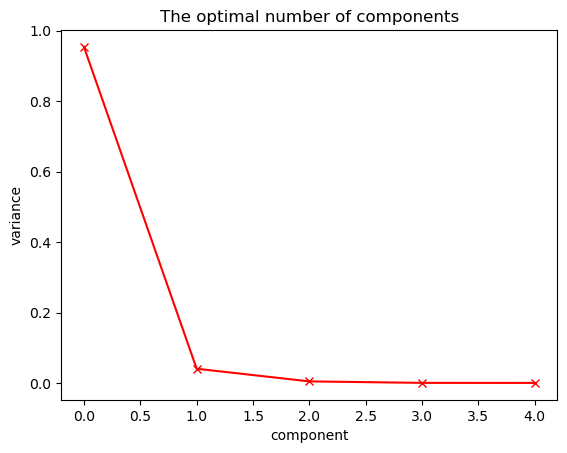

In [56]:
plt.plot(explained_variance, 'bx-', c='red')
plt.xlabel('component')
plt.ylabel('variance')
plt.title('The optimal number of components')
plt.show()

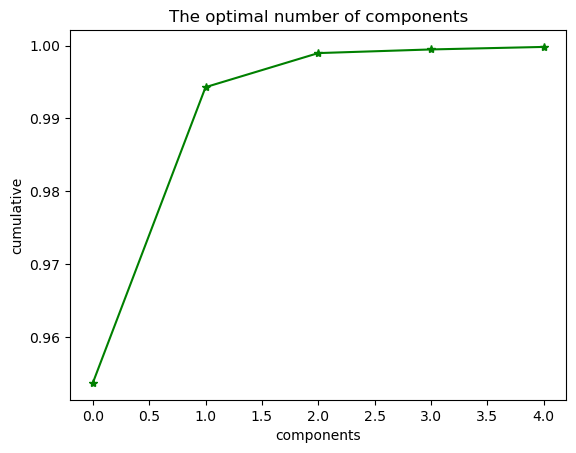

In [57]:
cumulative = np.cumsum(explained_variance)
plt.plot(cumulative, 'b*-', c='green')
plt.xlabel('components')
plt.ylabel('cumulative')
plt.title('The optimal number of components')
plt.show()

### Print out ten random rows from the final dataset

In [58]:
combined_df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
4336,7.4,0.20,0.28,9.10,0.047,29,95,0.99532,3.16,0.47,9.8,7,0
486,10.2,0.67,0.39,1.90,0.054,6,17,0.99760,3.17,0.47,10.0,5,1
2760,7.8,0.30,0.29,16.85,0.054,23,135,0.99980,3.16,0.38,9.0,6,0
3554,6.4,0.29,0.28,11.10,0.063,66,169,0.99730,2.89,0.57,9.0,5,0
5779,6.5,0.31,0.61,13.00,0.053,31,123,0.99708,3.09,0.50,9.3,6,0
1833,7.2,0.23,0.38,14.30,0.058,55,194,0.99790,3.09,0.44,9.0,6,0
5187,6.8,0.19,0.71,17.50,0.042,21,114,0.99784,2.85,0.50,9.5,6,0
4781,5.5,0.12,0.33,1.00,0.038,23,131,0.99164,3.25,0.45,9.8,5,0
651,9.8,0.88,0.25,2.50,0.104,35,155,1.00100,3.41,0.67,11.2,5,1
2981,6.6,0.56,0.16,3.10,0.045,28,92,0.99400,3.12,0.35,9.1,6,0


In [59]:
print(pca_df.sample(n=10))

            PC1        PC2       PC3       PC4       PC5
5343  32.377433  -8.979577  8.204953 -0.267194  0.072866
3519  46.264617  11.229100  3.555569  0.338515  1.443030
4980   4.688926  -2.720389 -2.133438 -1.765991  0.914620
2367  -0.096572  10.901314  3.216188 -0.223389 -0.472711
2852  52.684273   9.425091 -6.136905 -0.744812  1.759867
4732   1.625373  14.473813 -1.073397 -0.832428 -0.048033
3867  36.324527  -4.028922 -0.798918  0.565026 -1.458380
3346  52.539110  -9.830860  2.720653  1.256436  0.685334
237  -78.319307   2.584979 -0.248954  0.646943 -1.403504
418  -98.670733  -0.818359  0.766411  3.142195  2.447926
